In [36]:
import numpy as np
from sklearn.metrics import mean_squared_error as mse
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from scipy.stats import spearmanr
import pandas as pd
import seaborn as sns

In [46]:
directory_data = "data/"
directory_outputs = "outputs/"
kdd = "kdd"
nsl = "nsl"
ids = "ids"
filename = "5_correlation_ent"

In [3]:
y_pred_train_ids = np.loadtxt(directory_outputs + ids + "_pred_train_ent.csv", delimiter=",")
y_pred_val_ids = np.loadtxt(directory_outputs + ids + "_pred_val_ent.csv", delimiter=",")
y_pred_test_ids = np.loadtxt(directory_outputs + ids + "_pred_test_ent.csv", delimiter=",")

y_pred_train_nsl = np.loadtxt(directory_outputs + nsl + "_pred_train_ent.csv", delimiter=",")
y_pred_val_nsl = np.loadtxt(directory_outputs + nsl + "_pred_val_ent.csv", delimiter=",")
y_pred_test_nsl = np.loadtxt(directory_outputs + nsl +"_pred_test_ent.csv", delimiter=",")

y_pred_train_kdd = np.loadtxt(directory_outputs + kdd + "_pred_train_ent.csv", delimiter=",")
y_pred_val_kdd = np.loadtxt(directory_outputs + kdd +"_pred_val_ent.csv", delimiter=",")
y_pred_test_kdd = np.loadtxt(directory_outputs + kdd +"_pred_test_ent.csv", delimiter=",")

In [9]:
XY_kdd_train = np.loadtxt(directory_data + kdd + "_train_latent.csv", delimiter=',')
y_train_kdd = XY_kdd_train[:, -1]
X_train_kdd = XY_kdd_train[:, :-2]
XY_kdd_val = np.loadtxt(directory_data + kdd + "_val_latent.csv", delimiter=',')
y_val_kdd = XY_kdd_val[:, -1]
X_val_kdd = XY_kdd_val[:, :-2]
XY_kdd_test = np.loadtxt(directory_data + kdd +"_test_latent.csv", delimiter=',')
y_test_kdd = XY_kdd_test[:, -1]
X_test_kdd = XY_kdd_test[:, :-2]
    
XY_nsl_train = np.loadtxt(directory_data + nsl + "_train_latent.csv", delimiter=',')
y_train_nsl = XY_nsl_train[:, -1]
X_train_nsl = XY_nsl_train[:, :-2]
XY_nsl_val = np.loadtxt(directory_data + nsl + "_val_latent.csv", delimiter=',')
y_val_nsl = XY_nsl_val[:, -1]
X_val_nsl = XY_nsl_val[:, :-2]
XY_nsl_test = np.loadtxt(directory_data + nsl + "_test_latent.csv", delimiter=',')
y_test_nsl = XY_nsl_test[:, -1]
X_test_nsl = XY_nsl_test[:, :-2]
    
XY_ids_train = np.loadtxt(directory_data + ids + "_train_latent.csv", delimiter=',')
y_train_ids = XY_ids_train[:, -1]
X_train_ids = XY_ids_train[:, :-2]
XY_ids_val = np.loadtxt(directory_data + ids + "_val_latent.csv", delimiter=',')
y_val_ids = XY_ids_val[:, -1]
X_val_ids = XY_ids_val[:, :-2]
XY_ids_test = np.loadtxt(directory_data + ids + "_test_latent.csv", delimiter=',')
y_test_ids = XY_ids_test[:, -1]
X_test_ids = XY_ids_test[:, :-2]

In [35]:
yi_train_kdd = pd.DataFrame(data={'ensemble': y_train_kdd, 'prediction': y_pred_train_kdd})
yi_val_kdd = pd.DataFrame(data={'ensemble': y_val_kdd, 'prediction': y_pred_val_kdd})
yi_test_kdd = pd.DataFrame(data={'ensemble': y_test_kdd, 'prediction': y_pred_test_kdd})

yi_train_nsl = pd.DataFrame(data={'ensemble': y_train_nsl, 'prediction': y_pred_train_nsl})
yi_val_nsl = pd.DataFrame(data={'ensemble': y_val_nsl, 'prediction': y_pred_val_nsl})
yi_test_nsl = pd.DataFrame(data={'ensemble': y_test_nsl, 'prediction': y_pred_test_nsl})

yi_train_ids = pd.DataFrame(data={'ensemble': y_train_ids, 'prediction': y_pred_train_ids})
yi_val_ids = pd.DataFrame(data={'ensemble': y_val_ids, 'prediction': y_pred_val_ids})
yi_test_ids = pd.DataFrame(data={'ensemble': y_test_ids, 'prediction': y_pred_test_ids})

### Data description

### MSE

In [5]:
mse(y_train_kdd, y_pred_train_kdd), mse(y_val_kdd, y_pred_val_kdd), mse(y_test_kdd, y_pred_test_kdd)

(7.711374682887849e-05, 8.11436499678395e-05, 8.135426381259768e-05)

In [6]:
mse(y_train_nsl, y_pred_train_nsl), mse(y_val_nsl, y_pred_val_nsl), mse(y_test_nsl, y_pred_test_nsl)

(0.0001471900411173599, 0.00015118512004165028, 0.00015126825071593166)

In [7]:
mse(y_train_ids, y_pred_train_ids), mse(y_val_ids, y_pred_val_ids), mse(y_test_ids, y_pred_test_ids)

(3.0200513449993626e-08, 2.991214392564991e-08, 2.9776338867520765e-08)

### RMSCE

### Plots

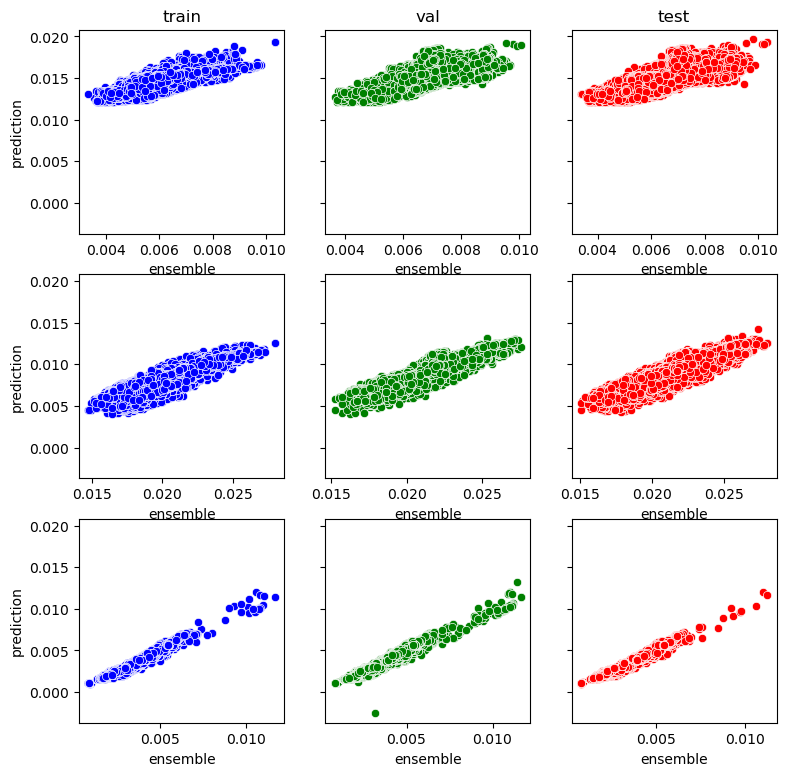

In [50]:
fig, axes = plt.subplots(3, 3, figsize=(9, 9), sharey=True)
#kdd
sns.scatterplot(ax=axes[0, 0], data=yi_train_kdd, x="ensemble", y="prediction", color='blue')
axes[0, 0].set_title("train")
sns.scatterplot(ax=axes[0, 1], data=yi_val_kdd, x="ensemble", y="prediction", color='green')
axes[0, 1].set_title("val")
sns.scatterplot(ax=axes[0, 2], data=yi_test_kdd, x="ensemble", y="prediction", color='red')
axes[0, 2].set_title("test")
#nsl
sns.scatterplot(ax=axes[1, 0], data=yi_train_nsl, x="ensemble", y="prediction", color='blue')
sns.scatterplot(ax=axes[1, 1], data=yi_val_nsl, x="ensemble", y="prediction", color='green')
sns.scatterplot(ax=axes[1, 2], data=yi_test_nsl, x="ensemble", y="prediction", color='red')
#ids
sns.scatterplot(ax=axes[2, 0], data=yi_train_ids, x="ensemble", y="prediction", color='blue')
sns.scatterplot(ax=axes[2, 1], data=yi_val_ids, x="ensemble", y="prediction", color='green')
sns.scatterplot(ax=axes[2, 2], data=yi_test_ids, x="ensemble", y="prediction", color='red')
plt.savefig(filename+".png", dpi=300)

### COV

In [23]:
np.cov(y_train_kdd, y_pred_train_kdd), np.cov(y_val_kdd, y_pred_val_kdd), np.cov(y_test_kdd, y_pred_test_kdd)

(array([[5.64985770e-07, 4.66459894e-07],
        [4.66459894e-07, 6.73486899e-07]]),
 array([[6.82105230e-07, 6.97024129e-07],
        [6.97024129e-07, 1.87665598e-06]]),
 array([[6.86290133e-07, 6.94562396e-07],
        [6.94562396e-07, 1.86635937e-06]]))

### Pearson’s Correlation

In [25]:
corr, _ = pearsonr(y_train_kdd, y_pred_train_kdd)
corr

0.7561900843180555

In [28]:
corr, _ = pearsonr(y_val_kdd, y_pred_val_kdd)
corr

0.6160696148315719

In [27]:
corr, _ = pearsonr(y_test_kdd, y_pred_test_kdd)
corr

0.6137051291174912

### Spearman’s Correlation

In [29]:
corr, _ = spearmanr(y_train_kdd, y_pred_train_kdd)
corr

0.8001405503324628

In [30]:
corr, _ = spearmanr(y_val_kdd, y_pred_val_kdd)
corr

0.6160696148315719

In [31]:
corr, _ = spearmanr(y_test_kdd, y_pred_test_kdd)
corr

0.6184470201410761